<a href="https://colab.research.google.com/github/MariaAlice12/DS_Unesp/blob/main/Trab1_CD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-53-f9e374659a7a>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['type_exercise'] = df_filtered['type_exercise'].str.split(';')



### Análise da Frequência dos Tipos de Exercício

A tabela abaixo apresenta a análise das respostas relacionadas ao tipo de exercício praticado pelos participantes da pesquisa. Foram consideradas respostas com múltipla escolha, separadas por ponto e vírgula, e contabilizadas individualmente.

As colunas incluem:
- **Tipo de Exercício**: a atividade mencionada pelo participante;
- **Frequência**: número de vezes que o exercício foi citado;
- **Frequência Acumulada**: soma progressiva das citações, útil para observar a concentração das preferências;
- **Porcentagem (%)**: participação percentual de cada exercício em relação ao total de menções;
- **Porcentagem Acumulada (%)**: soma progressiva dos percentuais, permitindo identificar a partir de que ponto se cobre a maior parte das respostas.

Essas informações auxiliam na identificação dos exercícios mais comuns e podem servir de base para decisões pedagógicas ou para construção de programas de atividades mais alinhados às preferências do público.


Tipo de Exercício,Frequência,Frequência Acumulada,Porcentagem (%),Porcentagem Acumulada (%)
Musculação,31,31,54.39%,54.39%
Corrida,12,43,21.05%,75.44%
Esportes Coletivos,4,47,7.02%,82.46%
Treinamento Funcional,3,50,5.26%,87.72%
Nenhum/Não pratico,3,53,5.26%,92.98%
Caminhada,1,54,1.75%,94.73%
Natação,1,55,1.75%,96.48%
Esporte utilitário,1,56,1.75%,98.23%
Judô,1,57,1.75%,99.98%
Total,57,446,100.00%,100.00%


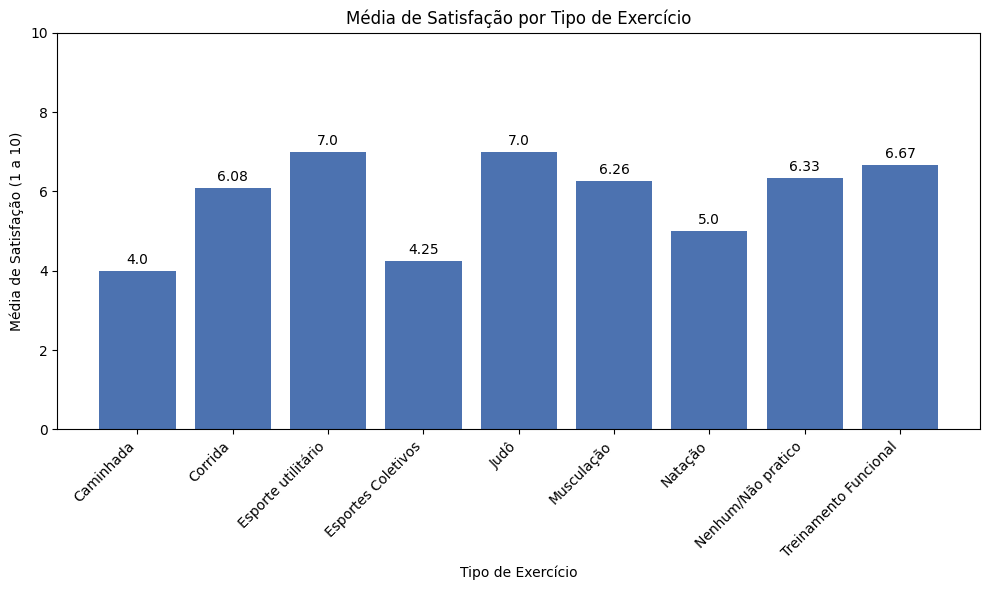

,type_exercise,Motivação Mais Frequente,Percentual (%)
0,Caminhada,Bem estar mental,33.33
3,Corrida,Bem estar mental,34.62
8,Esporte utilitário,Bem estar mental,50.00
10,Esportes Coletivos,Bem estar mental,27.27
14,Judô,Bem estar mental,33.33
18,Musculação,Estética,31.82
22,Natação,Bem estar mental,25.00
26,Nenhum/Não pratico,Não treino,100.00
28,Treinamento Funcional,Estética,50.00



### Análise do Tempo de Prática e Percepções de Mudanças

A tabela abaixo apresenta a análise das respostas relacionadas ao tipo de exercício praticado pelos participantes da pesquisa. Foram consideradas respostas com múltipla escolha, separadas por ponto e vírgula, e contabilizadas individualmente.

As colunas incluem:
- **Tipo de Exercício**: a atividade mencionada pelo participante;
- **Frequência**: número de vezes que o exercício foi citado;
- **Frequência Acumulada**: soma progressiva das citações, útil para observar a concentração das preferências;
- **Porcentagem (%)**: participação percentual de cada exercício em relação ao total de menções;
- **Porcentagem Acumulada (%)**: soma progressiva dos percentuais, permitindo identificar a partir de que ponto se cobre a maior parte das respostas.

Essas informações auxiliam na identificação dos exercícios mais comuns e podem servir de base para decisões pedagógicas ou para construção de programas de atividades mais alinhados às preferências do público.


Motivação,Frequência,Frequência Acumulada,Porcentagem (%),Porcentagem Acumulada (%)
Saúde,37,37,29.60%,29.60%
Bem estar mental,36,73,28.80%,58.40%
Estética,34,107,27.20%,85.60%
Socialização,10,117,8.00%,93.60%
Recomendação médica,5,122,4.00%,97.60%
Não treino,3,125,2.40%,100.00%
Total,125,581,100.00%,100.00%


In [53]:
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

def calcular_frequencia_percentual(df_col, nome_coluna='Categoria'):
    # Conta os valores únicos
    df_counts = df_col.value_counts().reset_index()
    df_counts.columns = [nome_coluna, 'Frequência']

    # Calcula colunas adicionais
    df_counts['Frequência Acumulada'] = df_counts['Frequência'].cumsum()
    df_counts['Porcentagem (%)'] = (df_counts['Frequência'] / df_counts['Frequência'].sum() * 100).round(2)
    df_counts['Porcentagem Acumulada (%)'] = df_counts['Porcentagem (%)'].cumsum().round(2)

    # Linha de total
    total_freq = df_counts['Frequência'].sum()
    total_freq_absolut = df_counts['Frequência Acumulada'].sum()
    linha_total = pd.DataFrame({
        nome_coluna: ['Total'],
        'Frequência': [total_freq],
        'Frequência Acumulada': [total_freq_absolut],
        'Porcentagem (%)': [100.0],
        'Porcentagem Acumulada (%)': [100.0]
    })

    # Junta tudo
    df_counts_final = pd.concat([df_counts, linha_total], ignore_index=True)

    # Formatação visual
    styled = df_counts_final.style.set_table_styles([
        {'selector': 'th', 'props': [('font-size', '13pt'), ('background-color', '#f0f0f0'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
    ]).format({
        'Porcentagem (%)': '{:.2f}%',
        'Porcentagem Acumulada (%)': '{:.2f}%'
    }).hide(axis='index')

    return styled

# Lê o arquivo
df = pd.read_csv('DATA.txt', sep=',', dtype=str)

# Filtra colunas que NÃO contêm 'feedback', 'pontuação' ou 'data'
filtered_columns = [col for col in df.columns if not ("feedback" in col.lower() or "pontuação" in col.lower() or "data" in col.lower())]
df_filtered = df[filtered_columns]

# Renomeia as colunas
df_filtered.columns = ["frequency", "period_routine", "type_exercise",
                       "motivation", "satisfaction_rate", "humor_influency", "changes"]

# Divide por ";" e transforma em listas
df_filtered['type_exercise'] = df_filtered['type_exercise'].str.split(';')

# Explode a coluna para que cada exercício vire uma linha
df_exploded = df_filtered.explode('type_exercise')

# Remove espaços em branco em cada exercício (após o explode)
df_exploded['type_exercise'] = df_exploded['type_exercise'].str.strip()

# Agrupa valores equivalentes antes da contagem
df_exploded['type_exercise'] = df_exploded['type_exercise'].replace({
    'Não pratico': 'Nenhum/Não pratico',
    'Não prático': 'Nenhum/Não pratico',
    'Nenhum': 'Nenhum/Não pratico',
    'Não treino': 'Nenhum/Não pratico'
})

# Exemplo com a coluna 'type_exercise'
styled_table = calcular_frequencia_percentual(df_exploded['type_exercise'], nome_coluna='Tipo de Exercício')

# Seu texto explicativo
texto = """
### Análise da Frequência dos Tipos de Exercício

A tabela abaixo apresenta a análise das respostas relacionadas ao tipo de exercício praticado pelos participantes da pesquisa. Foram consideradas respostas com múltipla escolha, separadas por ponto e vírgula, e contabilizadas individualmente.

As colunas incluem:
- **Tipo de Exercício**: a atividade mencionada pelo participante;
- **Frequência**: número de vezes que o exercício foi citado;
- **Frequência Acumulada**: soma progressiva das citações, útil para observar a concentração das preferências;
- **Porcentagem (%)**: participação percentual de cada exercício em relação ao total de menções;
- **Porcentagem Acumulada (%)**: soma progressiva dos percentuais, permitindo identificar a partir de que ponto se cobre a maior parte das respostas.

Essas informações auxiliam na identificação dos exercícios mais comuns e podem servir de base para decisões pedagógicas ou para construção de programas de atividades mais alinhados às preferências do público.
"""

display(Markdown(texto))
display(styled_table)

# Converte satisfaction_rate para numérico (caso não esteja)
df_exploded['satisfaction_rate'] = pd.to_numeric(df_exploded['satisfaction_rate'], errors='coerce')

# Calcula a média por tipo de exercício
media_por_modalidade = df_exploded.groupby('type_exercise')['satisfaction_rate'].mean().round(2)

# Exibe como DataFrame para melhor visualização
media_por_modalidade = media_por_modalidade.reset_index().rename(columns={'satisfaction_rate': 'Média de Satisfação'})

# Gera o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(media_por_modalidade['type_exercise'], media_por_modalidade['Média de Satisfação'], color='#4C72B0')

# Personalizações
plt.title('Média de Satisfação por Tipo de Exercício')
plt.xlabel('Tipo de Exercício')
plt.ylabel('Média de Satisfação (1 a 10)')
plt.ylim(0, 10)
plt.xticks(rotation=45, ha='right')

# Adiciona os valores no topo das barras
for idx, row in media_por_modalidade.iterrows():
    plt.text(idx, row['Média de Satisfação'] + 0.1, str(row['Média de Satisfação']),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Garante que a coluna está limpa e separada corretamente
df_exploded['motivation'] = df_exploded['motivation'].str.strip().str.split(';')

# Explode corretamente a coluna motivation
df_exploded_motivation = df_exploded.explode('motivation')

# Remove espaços extras após explode
df_exploded_motivation['motivation'] = df_exploded_motivation['motivation'].str.strip()

# Conta quantas vezes cada motivação aparece por tipo de exercício
contagem = (
    df_exploded_motivation
    .groupby(['type_exercise', 'motivation'])
    .size()
    .reset_index(name='contagem')
)

# Soma total de respostas por exercício
total_por_exercicio = (
    contagem
    .groupby('type_exercise')['contagem']
    .sum()
    .reset_index(name='total')
)

# Junta os dois DataFrames
contagem = contagem.merge(total_por_exercicio, on='type_exercise')

# Calcula percentual
contagem['percentual'] = (contagem['contagem'] / contagem['total']) * 100

# Filtra apenas a motivação com maior contagem (moda) por exercício
moda_com_percentual = contagem.sort_values(['type_exercise', 'contagem'], ascending=[True, False])
moda_com_percentual = moda_com_percentual.drop_duplicates('type_exercise')

# Arredonda e renomeia colunas
moda_com_percentual['percentual'] = moda_com_percentual['percentual'].round(2)
moda_com_percentual = moda_com_percentual.rename(columns={
    'motivation': 'Motivação Mais Frequente',
    'percentual': 'Percentual (%)'
})

# Exibe resultado final
moda_final = moda_com_percentual[['type_exercise', 'Motivação Mais Frequente', 'Percentual (%)']]
display(moda_final)

# Exemplo com outra coluna, como 'motivation'
styled_motivation = calcular_frequencia_percentual(df_exploded_motivation['motivation'], nome_coluna='Motivação')

# Seu texto explicativo
second_insigth = """
### Análise do Tempo de Prática e Percepções de Mudanças

A tabela abaixo apresenta a análise das respostas relacionadas ao tipo de exercício praticado pelos participantes da pesquisa. Foram consideradas respostas com múltipla escolha, separadas por ponto e vírgula, e contabilizadas individualmente.

As colunas incluem:
- **Tipo de Exercício**: a atividade mencionada pelo participante;
- **Frequência**: número de vezes que o exercício foi citado;
- **Frequência Acumulada**: soma progressiva das citações, útil para observar a concentração das preferências;
- **Porcentagem (%)**: participação percentual de cada exercício em relação ao total de menções;
- **Porcentagem Acumulada (%)**: soma progressiva dos percentuais, permitindo identificar a partir de que ponto se cobre a maior parte das respostas.

Essas informações auxiliam na identificação dos exercícios mais comuns e podem servir de base para decisões pedagógicas ou para construção de programas de atividades mais alinhados às preferências do público.
"""

display(Markdown(second_insigth))
display(styled_motivation)

